In [1]:
import pandas as pd

df = pd.read_csv('Data/pacific-heights.csv')
df.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zipcode
0,2243 Franklin St,2.0,2,1463,2/5/2016,1950000,37.795139,-122.425309,Pacific Heights,7,Condominium,1900,94109
1,2002 Pacific Ave APT 4,3.5,3,3291,1/22/2016,4200000,37.794429,-122.428513,Pacific Heights,7,Condominium,1961,94109
2,1945 Washington St APT 411,1.0,1,653,12/16/2015,665000,37.792472,-122.425281,Pacific Heights,3,Condominium,1987,94109
3,1896 Pacific Ave APT 802,2.5,2,2272,12/17/2014,2735000,37.794706,-122.426347,Pacific Heights,6,Condominium,1924,94109
4,1840 Washington St APT 603,1.0,1,837,12/2/2015,1050000,37.793212,-122.423744,Pacific Heights,3,Condominium,2012,94109


In [2]:
df.shape

(439, 13)

In [3]:
corr_matrix = df.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.840864
bathrooms        0.768179
totalrooms       0.670726
bedrooms         0.606579
zipcode          0.296032
latitude         0.126480
yearbuilt       -0.214365
longitude       -0.309462
Name: lastsoldprice, dtype: float64

In [4]:
df = pd.get_dummies(df, columns=['usecode'])
df.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,yearbuilt,zipcode,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_MultiFamily2To4,usecode_SingleFamily,usecode_Townhouse
0,2243 Franklin St,2.0,2,1463,2/5/2016,1950000,37.795139,-122.425309,Pacific Heights,7,1900,94109,1,0,0,0,0,0
1,2002 Pacific Ave APT 4,3.5,3,3291,1/22/2016,4200000,37.794429,-122.428513,Pacific Heights,7,1961,94109,1,0,0,0,0,0
2,1945 Washington St APT 411,1.0,1,653,12/16/2015,665000,37.792472,-122.425281,Pacific Heights,3,1987,94109,1,0,0,0,0,0
3,1896 Pacific Ave APT 802,2.5,2,2272,12/17/2014,2735000,37.794706,-122.426347,Pacific Heights,6,1924,94109,1,0,0,0,0,0
4,1840 Washington St APT 603,1.0,1,837,12/2/2015,1050000,37.793212,-122.423744,Pacific Heights,3,2012,94109,1,0,0,0,0,0


In [5]:
corr_matrix = df.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice              1.000000
finishedsqft               0.840864
bathrooms                  0.768179
totalrooms                 0.670726
usecode_SingleFamily       0.638482
bedrooms                   0.606579
zipcode                    0.296032
latitude                   0.126480
usecode_Duplex             0.006292
usecode_MultiFamily2To4   -0.019009
usecode_Townhouse         -0.025467
usecode_Cooperative       -0.025556
yearbuilt                 -0.214365
longitude                 -0.309462
usecode_Condominium       -0.598575
Name: lastsoldprice, dtype: float64

In [6]:
# Filter the dataset down to the most significant columns
df = df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode_Condominium', 'usecode_SingleFamily', 'lastsoldprice']]
df.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode_Condominium,usecode_SingleFamily,lastsoldprice
0,2.0,2,1463,7,1,0,1950000
1,3.5,3,3291,7,1,0,4200000
2,1.0,1,653,3,1,0,665000
3,2.5,2,2272,6,1,0,2735000
4,1.0,1,837,3,1,0,1050000


In [7]:
corr_matrix = df.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice           1.000000
finishedsqft            0.840864
bathrooms               0.768179
totalrooms              0.670726
usecode_SingleFamily    0.638482
bedrooms                0.606579
usecode_Condominium    -0.598575
Name: lastsoldprice, dtype: float64

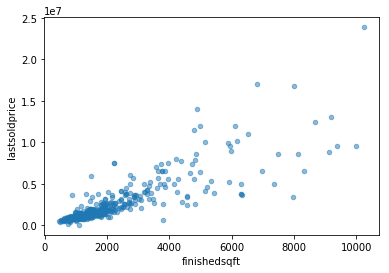

In [8]:
%matplotlib inline

df.plot(kind="scatter", x="finishedsqft", y="lastsoldprice", alpha=0.5)

In [9]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

x = df.drop('lastsoldprice', axis=1)
y = df['lastsoldprice']

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
pd.DataFrame(x).head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


,0,1,2,3,4,5
0,-0.285556,-0.399122,-0.403081,0.105818,0.620369,-0.564197
1,0.698425,0.140000,0.681683,0.105818,0.620369,-0.564197
2,-0.941543,-0.938244,-0.883748,-0.909570,0.620369,-0.564197
3,0.042437,-0.399122,0.076993,-0.148029,0.620369,-0.564197
4,-0.941543,-0.938244,-0.774559,-0.909570,0.620369,-0.564197


In [10]:
# Split the dataset into a training set and a test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [11]:
# Define the model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=6, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1)) 
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Train the model
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2000, batch_size=20)

Train on 351 samples, validate on 88 samples
Epoch 1/2000
351/351 [==============================] - 1s 4ms/step - loss: 2592182.0296 - mae: 2592181.7500 - val_loss: 2226046.5511 - val_mae: 2226046.2500
Epoch 2/2000
351/351 [==============================] - 0s 350us/step - loss: 2592179.2585 - mae: 2592179.2500 - val_loss: 2226042.5455 - val_mae: 2226042.5000
Epoch 3/2000
351/351 [==============================] - 0s 344us/step - loss: 2592173.0395 - mae: 2592172.7500 - val_loss: 2226033.6193 - val_mae: 2226033.5000
Epoch 4/2000
351/351 [==============================] - 0s 365us/step - loss: 2592159.8739 - mae: 2592159.7500 - val_loss: 2226015.8295 - val_mae: 2226015.7500
Epoch 5/2000
351/351 [==============================] - 0s 324us/step - loss: 2592136.1774 - mae: 2592136.0000 - val_loss: 2225985.3352 - val_mae: 2225985.2500
Epoch 6/2000
351/351 [==============================] - 0s 340us/step - loss: 2592096.3718 - mae: 2592096.0000 - val_loss: 2225937.3182 - val_mae: 2225937.50

Epoch 52/2000
351/351 [==============================] - 0s 347us/step - loss: 2491440.5499 - mae: 2491440.5000 - val_loss: 2125274.4375 - val_mae: 2125274.2500
Epoch 53/2000
351/351 [==============================] - 0s 307us/step - loss: 2485736.3547 - mae: 2485736.2500 - val_loss: 2119639.4375 - val_mae: 2119639.5000
Epoch 54/2000
351/351 [==============================] - 0s 317us/step - loss: 2479881.3565 - mae: 2479881.0000 - val_loss: 2113793.4148 - val_mae: 2113793.5000
Epoch 55/2000
351/351 [==============================] - 0s 331us/step - loss: 2473829.8989 - mae: 2473830.0000 - val_loss: 2107767.4659 - val_mae: 2107767.2500
Epoch 56/2000
351/351 [==============================] - 0s 333us/step - loss: 2467551.8533 - mae: 2467551.5000 - val_loss: 2101573.2045 - val_mae: 2101573.2500
Epoch 57/2000
351/351 [==============================] - 0s 327us/step - loss: 2461111.6204 - mae: 2461111.5000 - val_loss: 2095116.3182 - val_mae: 2095116.1250
Epoch 58/2000
351/351 [===========

Epoch 103/2000
351/351 [==============================] - 0s 317us/step - loss: 1983089.4103 - mae: 1983089.2500 - val_loss: 1609955.5284 - val_mae: 1609955.5000
Epoch 104/2000
351/351 [==============================] - 0s 276us/step - loss: 1972195.4092 - mae: 1972195.5000 - val_loss: 1598147.2812 - val_mae: 1598147.2500
Epoch 105/2000
351/351 [==============================] - 0s 259us/step - loss: 1961640.4779 - mae: 1961640.6250 - val_loss: 1586602.8551 - val_mae: 1586602.7500
Epoch 106/2000
351/351 [==============================] - 0s 310us/step - loss: 1951372.9544 - mae: 1951372.7500 - val_loss: 1575006.8551 - val_mae: 1575006.8750
Epoch 107/2000
351/351 [==============================] - 0s 333us/step - loss: 1940870.6061 - mae: 1940870.6250 - val_loss: 1564679.7017 - val_mae: 1564679.6250
Epoch 108/2000
351/351 [==============================] - 0s 340us/step - loss: 1931376.1781 - mae: 1931376.1250 - val_loss: 1553009.8892 - val_mae: 1553009.8750
Epoch 109/2000
351/351 [====

351/351 [==============================] - 0s 241us/step - loss: 1528167.0951 - mae: 1528167.0000 - val_loss: 1134957.9716 - val_mae: 1134958.0000
Epoch 154/2000
351/351 [==============================] - 0s 431us/step - loss: 1519286.1530 - mae: 1519286.0000 - val_loss: 1127823.0000 - val_mae: 1127823.0000
Epoch 155/2000
351/351 [==============================] - 0s 292us/step - loss: 1509590.3711 - mae: 1509590.3750 - val_loss: 1121127.7756 - val_mae: 1121127.8750
Epoch 156/2000
351/351 [==============================] - 0s 245us/step - loss: 1500330.2286 - mae: 1500330.1250 - val_loss: 1114072.6761 - val_mae: 1114072.6250
Epoch 157/2000
351/351 [==============================] - 0s 421us/step - loss: 1490484.2101 - mae: 1490484.0000 - val_loss: 1107261.1193 - val_mae: 1107261.1250
Epoch 158/2000
351/351 [==============================] - 0s 370us/step - loss: 1480980.3803 - mae: 1480980.3750 - val_loss: 1100458.8636 - val_mae: 1100458.8750
Epoch 159/2000
351/351 [===================

351/351 [==============================] - 0s 370us/step - loss: 1126813.2094 - mae: 1126813.1250 - val_loss: 858780.0597 - val_mae: 858780.0000
Epoch 205/2000
351/351 [==============================] - 0s 311us/step - loss: 1121983.5541 - mae: 1121983.5000 - val_loss: 857188.7983 - val_mae: 857188.7500
Epoch 206/2000
351/351 [==============================] - 0s 273us/step - loss: 1116707.3205 - mae: 1116707.3750 - val_loss: 855961.3097 - val_mae: 855961.3750
Epoch 207/2000
351/351 [==============================] - 0s 281us/step - loss: 1112458.6140 - mae: 1112458.6250 - val_loss: 854519.4886 - val_mae: 854519.4375
Epoch 208/2000
351/351 [==============================] - 0s 367us/step - loss: 1107561.7393 - mae: 1107561.6250 - val_loss: 853067.4773 - val_mae: 853067.4375
Epoch 209/2000
351/351 [==============================] - 0s 353us/step - loss: 1103282.2087 - mae: 1103282.1250 - val_loss: 851633.6222 - val_mae: 851633.5625
Epoch 210/2000
351/351 [==============================]

351/351 [==============================] - 0s 497us/step - loss: 1000400.6006 - mae: 1000400.5000 - val_loss: 805348.9460 - val_mae: 805348.9375
Epoch 256/2000
351/351 [==============================] - 0s 402us/step - loss: 998864.3681 - mae: 998864.4375 - val_loss: 804329.6506 - val_mae: 804329.6250
Epoch 257/2000
351/351 [==============================] - 0s 347us/step - loss: 997397.9995 - mae: 997398.2500 - val_loss: 803511.5739 - val_mae: 803511.5625
Epoch 258/2000
351/351 [==============================] - 0s 259us/step - loss: 995814.5588 - mae: 995814.6250 - val_loss: 802715.8920 - val_mae: 802715.8125
Epoch 259/2000
351/351 [==============================] - 0s 382us/step - loss: 994367.8589 - mae: 994367.8125 - val_loss: 801737.6080 - val_mae: 801737.6250
Epoch 260/2000
351/351 [==============================] - 0s 337us/step - loss: 992757.0960 - mae: 992757.0625 - val_loss: 801238.8636 - val_mae: 801238.8125
Epoch 261/2000
351/351 [==============================] - 0s 364u

Epoch 307/2000
351/351 [==============================] - 0s 296us/step - loss: 936267.1084 - mae: 936267.1875 - val_loss: 768155.5384 - val_mae: 768155.5625
Epoch 308/2000
351/351 [==============================] - 0s 230us/step - loss: 935261.4462 - mae: 935261.4375 - val_loss: 767475.2571 - val_mae: 767475.2500
Epoch 309/2000
351/351 [==============================] - 0s 281us/step - loss: 934112.5694 - mae: 934112.5625 - val_loss: 767187.6960 - val_mae: 767187.6250
Epoch 310/2000
351/351 [==============================] - 0s 305us/step - loss: 933125.7908 - mae: 933125.8125 - val_loss: 766755.4134 - val_mae: 766755.4375
Epoch 311/2000
351/351 [==============================] - 0s 241us/step - loss: 932060.5725 - mae: 932060.6250 - val_loss: 766133.7614 - val_mae: 766133.7500
Epoch 312/2000
351/351 [==============================] - 0s 268us/step - loss: 930993.2436 - mae: 930993.3125 - val_loss: 765280.7344 - val_mae: 765280.7500
Epoch 313/2000
351/351 [============================

Epoch 359/2000
351/351 [==============================] - 0s 317us/step - loss: 895392.2069 - mae: 895392.1875 - val_loss: 746754.0227 - val_mae: 746754.0000
Epoch 360/2000
351/351 [==============================] - 0s 363us/step - loss: 894714.8269 - mae: 894714.8125 - val_loss: 746290.2997 - val_mae: 746290.3125
Epoch 361/2000
351/351 [==============================] - 0s 273us/step - loss: 894003.8693 - mae: 894003.8750 - val_loss: 745868.1449 - val_mae: 745868.1250
Epoch 362/2000
351/351 [==============================] - 0s 267us/step - loss: 893420.1353 - mae: 893420.1250 - val_loss: 745934.2088 - val_mae: 745934.1875
Epoch 363/2000
351/351 [==============================] - 0s 404us/step - loss: 892654.2358 - mae: 892654.3125 - val_loss: 745792.1960 - val_mae: 745792.1875
Epoch 364/2000
351/351 [==============================] - 0s 313us/step - loss: 891971.7792 - mae: 891971.7500 - val_loss: 745172.0810 - val_mae: 745172.0625
Epoch 365/2000
351/351 [============================

Epoch 411/2000
351/351 [==============================] - 0s 341us/step - loss: 863398.9890 - mae: 863398.9375 - val_loss: 734714.9446 - val_mae: 734715.0000
Epoch 412/2000
351/351 [==============================] - 0s 205us/step - loss: 862972.8816 - mae: 862972.8125 - val_loss: 734409.6080 - val_mae: 734409.5625
Epoch 413/2000
351/351 [==============================] - 0s 380us/step - loss: 862598.0693 - mae: 862598.0000 - val_loss: 734191.0256 - val_mae: 734191.0000
Epoch 414/2000
351/351 [==============================] - 0s 331us/step - loss: 862165.2026 - mae: 862165.1250 - val_loss: 734032.3352 - val_mae: 734032.3750
Epoch 415/2000
351/351 [==============================] - 0s 346us/step - loss: 861792.7605 - mae: 861792.7500 - val_loss: 733700.3438 - val_mae: 733700.3125
Epoch 416/2000
351/351 [==============================] - 0s 374us/step - loss: 861395.3476 - mae: 861395.4375 - val_loss: 733650.8807 - val_mae: 733650.8750
Epoch 417/2000
351/351 [============================

Epoch 463/2000
351/351 [==============================] - 0s 356us/step - loss: 847035.4811 - mae: 847035.5625 - val_loss: 732703.2159 - val_mae: 732703.2500
Epoch 464/2000
351/351 [==============================] - 0s 309us/step - loss: 846617.0846 - mae: 846617.0625 - val_loss: 732733.6719 - val_mae: 732733.6250
Epoch 465/2000
351/351 [==============================] - 0s 341us/step - loss: 846392.6446 - mae: 846392.6250 - val_loss: 732840.1861 - val_mae: 732840.1875
Epoch 466/2000
351/351 [==============================] - 0s 360us/step - loss: 846202.5175 - mae: 846202.6250 - val_loss: 733098.2812 - val_mae: 733098.3125
Epoch 467/2000
351/351 [==============================] - 0s 350us/step - loss: 845958.2603 - mae: 845958.1250 - val_loss: 733002.6705 - val_mae: 733002.6875
Epoch 468/2000
351/351 [==============================] - 0s 273us/step - loss: 845727.3568 - mae: 845727.4375 - val_loss: 733096.0341 - val_mae: 733096.0625
Epoch 469/2000
351/351 [============================

Epoch 515/2000
351/351 [==============================] - 0s 329us/step - loss: 835974.6797 - mae: 835974.7500 - val_loss: 735324.5099 - val_mae: 735324.4375
Epoch 516/2000
351/351 [==============================] - 0s 267us/step - loss: 835990.8139 - mae: 835990.8125 - val_loss: 735797.3267 - val_mae: 735797.2500
Epoch 517/2000
351/351 [==============================] - 0s 393us/step - loss: 835492.5221 - mae: 835492.5625 - val_loss: 735527.7031 - val_mae: 735527.7500
Epoch 518/2000
351/351 [==============================] - 0s 335us/step - loss: 835396.5201 - mae: 835396.6250 - val_loss: 735095.9560 - val_mae: 735095.9375
Epoch 519/2000
351/351 [==============================] - 0s 263us/step - loss: 835234.7993 - mae: 835234.8125 - val_loss: 735278.3537 - val_mae: 735278.3125
Epoch 520/2000
351/351 [==============================] - 0s 295us/step - loss: 834985.6976 - mae: 834985.7500 - val_loss: 735322.2173 - val_mae: 735322.2500
Epoch 521/2000
351/351 [============================

Epoch 567/2000
351/351 [==============================] - 0s 312us/step - loss: 824461.1269 - mae: 824461.1250 - val_loss: 738047.8139 - val_mae: 738047.7500
Epoch 568/2000
351/351 [==============================] - 0s 337us/step - loss: 824217.9617 - mae: 824218.0000 - val_loss: 737703.0909 - val_mae: 737703.0625
Epoch 569/2000
351/351 [==============================] - 0s 303us/step - loss: 824002.3615 - mae: 824002.3750 - val_loss: 737688.1932 - val_mae: 737688.1875
Epoch 570/2000
351/351 [==============================] - 0s 323us/step - loss: 823811.8356 - mae: 823811.8125 - val_loss: 737701.9602 - val_mae: 737701.9375
Epoch 571/2000
351/351 [==============================] - 0s 254us/step - loss: 823630.9526 - mae: 823630.9375 - val_loss: 737776.6662 - val_mae: 737776.6250
Epoch 572/2000
351/351 [==============================] - 0s 260us/step - loss: 823442.4712 - mae: 823442.4375 - val_loss: 737657.9957 - val_mae: 737657.9375
Epoch 573/2000
351/351 [============================

Epoch 619/2000
351/351 [==============================] - 0s 312us/step - loss: 815137.5454 - mae: 815137.6250 - val_loss: 736445.3892 - val_mae: 736445.4375
Epoch 620/2000
351/351 [==============================] - 0s 281us/step - loss: 814895.1603 - mae: 814895.1250 - val_loss: 736322.9730 - val_mae: 736322.9375
Epoch 621/2000
351/351 [==============================] - 0s 418us/step - loss: 814711.4679 - mae: 814711.4375 - val_loss: 736352.2557 - val_mae: 736352.2500
Epoch 622/2000
351/351 [==============================] - 0s 256us/step - loss: 814615.0050 - mae: 814615.0000 - val_loss: 736446.1080 - val_mae: 736446.0625
Epoch 623/2000
351/351 [==============================] - 0s 313us/step - loss: 814391.7861 - mae: 814391.8125 - val_loss: 736560.5824 - val_mae: 736560.5625
Epoch 624/2000
351/351 [==============================] - 0s 342us/step - loss: 814330.6809 - mae: 814330.6875 - val_loss: 736116.1264 - val_mae: 736116.0625
Epoch 625/2000
351/351 [============================

351/351 [==============================] - 0s 294us/step - loss: 806662.4117 - mae: 806662.3750 - val_loss: 735188.7855 - val_mae: 735188.7500
Epoch 671/2000
351/351 [==============================] - 0s 271us/step - loss: 806549.6495 - mae: 806549.6875 - val_loss: 735431.0014 - val_mae: 735431.0000
Epoch 672/2000
351/351 [==============================] - 0s 325us/step - loss: 806509.0509 - mae: 806509.0625 - val_loss: 734962.0724 - val_mae: 734962.0625
Epoch 673/2000
351/351 [==============================] - 0s 267us/step - loss: 806189.9736 - mae: 806189.8750 - val_loss: 734815.7401 - val_mae: 734815.7500
Epoch 674/2000
351/351 [==============================] - 0s 268us/step - loss: 806359.2696 - mae: 806359.1875 - val_loss: 734355.3651 - val_mae: 734355.3125
Epoch 675/2000
351/351 [==============================] - 0s 340us/step - loss: 805988.2666 - mae: 805988.3125 - val_loss: 735527.1989 - val_mae: 735527.1875
Epoch 676/2000
351/351 [==============================] - 0s 388us/

Epoch 722/2000
351/351 [==============================] - 0s 301us/step - loss: 798072.4809 - mae: 798072.3125 - val_loss: 736228.0043 - val_mae: 736228.0000
Epoch 723/2000
351/351 [==============================] - 0s 242us/step - loss: 797956.4156 - mae: 797956.3750 - val_loss: 736449.6349 - val_mae: 736449.5625
Epoch 724/2000
351/351 [==============================] - 0s 308us/step - loss: 797877.2322 - mae: 797877.2500 - val_loss: 736597.6321 - val_mae: 736597.5625
Epoch 725/2000
351/351 [==============================] - 0s 262us/step - loss: 797620.5345 - mae: 797620.6250 - val_loss: 736364.3509 - val_mae: 736364.3125
Epoch 726/2000
351/351 [==============================] - 0s 351us/step - loss: 797494.4660 - mae: 797494.4375 - val_loss: 736466.0710 - val_mae: 736466.0625
Epoch 727/2000
351/351 [==============================] - 0s 272us/step - loss: 797300.3244 - mae: 797300.3125 - val_loss: 736235.4517 - val_mae: 736235.4375
Epoch 728/2000
351/351 [============================

Epoch 774/2000
351/351 [==============================] - 0s 332us/step - loss: 789885.9168 - mae: 789885.8750 - val_loss: 735596.9134 - val_mae: 735596.9375
Epoch 775/2000
351/351 [==============================] - 0s 451us/step - loss: 789736.8796 - mae: 789736.8125 - val_loss: 735612.4588 - val_mae: 735612.4375
Epoch 776/2000
351/351 [==============================] - 0s 357us/step - loss: 789586.8914 - mae: 789586.8750 - val_loss: 735653.6364 - val_mae: 735653.6250
Epoch 777/2000
351/351 [==============================] - 0s 360us/step - loss: 789466.0992 - mae: 789466.0625 - val_loss: 735624.3026 - val_mae: 735624.3125
Epoch 778/2000
351/351 [==============================] - 0s 359us/step - loss: 789469.5698 - mae: 789469.5625 - val_loss: 735087.9858 - val_mae: 735087.9375
Epoch 779/2000
351/351 [==============================] - 0s 249us/step - loss: 789175.3632 - mae: 789175.4375 - val_loss: 735441.4730 - val_mae: 735441.4375
Epoch 780/2000
351/351 [============================

Epoch 825/2000
351/351 [==============================] - 0s 247us/step - loss: 782555.2053 - mae: 782555.2500 - val_loss: 731959.1974 - val_mae: 731959.1875
Epoch 826/2000
351/351 [==============================] - 0s 320us/step - loss: 782416.7382 - mae: 782416.5625 - val_loss: 732025.7841 - val_mae: 732025.7500
Epoch 827/2000
351/351 [==============================] - 0s 205us/step - loss: 782193.9296 - mae: 782193.8750 - val_loss: 731998.5142 - val_mae: 731998.5000
Epoch 828/2000
351/351 [==============================] - 0s 272us/step - loss: 782055.3479 - mae: 782055.3125 - val_loss: 732031.1108 - val_mae: 732031.1250
Epoch 829/2000
351/351 [==============================] - 0s 227us/step - loss: 781874.7375 - mae: 781874.7500 - val_loss: 732070.9432 - val_mae: 732070.9375
Epoch 830/2000
351/351 [==============================] - 0s 338us/step - loss: 781728.0464 - mae: 781728.0000 - val_loss: 731929.6733 - val_mae: 731929.6250
Epoch 831/2000
351/351 [============================

Epoch 877/2000
351/351 [==============================] - 0s 311us/step - loss: 774564.0114 - mae: 774563.9375 - val_loss: 730167.6946 - val_mae: 730167.6875
Epoch 878/2000
351/351 [==============================] - 0s 299us/step - loss: 774382.9466 - mae: 774382.8750 - val_loss: 730094.2670 - val_mae: 730094.2500
Epoch 879/2000
351/351 [==============================] - 0s 297us/step - loss: 774232.4277 - mae: 774232.4375 - val_loss: 730222.4077 - val_mae: 730222.4375
Epoch 880/2000
351/351 [==============================] - 0s 454us/step - loss: 774108.1857 - mae: 774108.1875 - val_loss: 730056.1804 - val_mae: 730056.1875
Epoch 881/2000
351/351 [==============================] - 0s 461us/step - loss: 773924.4249 - mae: 773924.3750 - val_loss: 729813.5511 - val_mae: 729813.5625
Epoch 882/2000
351/351 [==============================] - 0s 295us/step - loss: 773752.5776 - mae: 773752.6250 - val_loss: 729971.7827 - val_mae: 729971.7500
Epoch 883/2000
351/351 [============================

Epoch 929/2000
351/351 [==============================] - 0s 287us/step - loss: 766281.0463 - mae: 766281.0000 - val_loss: 730633.4077 - val_mae: 730633.4375
Epoch 930/2000
351/351 [==============================] - 0s 366us/step - loss: 766119.6820 - mae: 766119.6875 - val_loss: 730307.4929 - val_mae: 730307.4375
Epoch 931/2000
351/351 [==============================] - 0s 346us/step - loss: 765950.6170 - mae: 765950.5625 - val_loss: 730593.9290 - val_mae: 730593.9375
Epoch 932/2000
351/351 [==============================] - 0s 363us/step - loss: 765819.1529 - mae: 765819.1875 - val_loss: 730677.3494 - val_mae: 730677.3750
Epoch 933/2000
351/351 [==============================] - 0s 322us/step - loss: 765617.0424 - mae: 765617.0625 - val_loss: 730387.2060 - val_mae: 730387.1875
Epoch 934/2000
351/351 [==============================] - 0s 307us/step - loss: 765562.0577 - mae: 765562.0000 - val_loss: 730860.7003 - val_mae: 730860.7500
Epoch 935/2000
351/351 [============================

Epoch 981/2000
351/351 [==============================] - 0s 314us/step - loss: 757741.6086 - mae: 757741.6875 - val_loss: 731625.9503 - val_mae: 731625.9375
Epoch 982/2000
351/351 [==============================] - 0s 357us/step - loss: 757591.7749 - mae: 757591.8125 - val_loss: 731974.5838 - val_mae: 731974.5625
Epoch 983/2000
351/351 [==============================] - 0s 334us/step - loss: 757388.5356 - mae: 757388.5625 - val_loss: 731764.5597 - val_mae: 731764.5625
Epoch 984/2000
351/351 [==============================] - 0s 329us/step - loss: 757181.8064 - mae: 757181.8125 - val_loss: 731761.3082 - val_mae: 731761.3125
Epoch 985/2000
351/351 [==============================] - 0s 304us/step - loss: 757121.7026 - mae: 757121.7500 - val_loss: 732398.2514 - val_mae: 732398.1875
Epoch 986/2000
351/351 [==============================] - 0s 297us/step - loss: 756844.5370 - mae: 756844.5000 - val_loss: 732591.6278 - val_mae: 732591.6250
Epoch 987/2000
351/351 [============================

351/351 [==============================] - 0s 296us/step - loss: 749765.7964 - mae: 749765.7500 - val_loss: 732412.3125 - val_mae: 732412.2500
Epoch 1033/2000
351/351 [==============================] - 0s 354us/step - loss: 749637.8159 - mae: 749637.9375 - val_loss: 732263.7244 - val_mae: 732263.7500
Epoch 1034/2000
351/351 [==============================] - 0s 290us/step - loss: 749449.6494 - mae: 749449.6875 - val_loss: 732325.1165 - val_mae: 732325.0625
Epoch 1035/2000
351/351 [==============================] - 0s 370us/step - loss: 749367.3632 - mae: 749367.3750 - val_loss: 732240.6548 - val_mae: 732240.5625
Epoch 1036/2000
351/351 [==============================] - 0s 360us/step - loss: 749159.4341 - mae: 749159.4375 - val_loss: 732397.3892 - val_mae: 732397.3750
Epoch 1037/2000
351/351 [==============================] - 0s 263us/step - loss: 749120.6369 - mae: 749120.6875 - val_loss: 732752.7898 - val_mae: 732752.8750
Epoch 1038/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 412us/step - loss: 743343.2188 - mae: 743343.2500 - val_loss: 733704.4048 - val_mae: 733704.3750
Epoch 1084/2000
351/351 [==============================] - 0s 257us/step - loss: 743189.0896 - mae: 743189.1250 - val_loss: 733962.3466 - val_mae: 733962.2500
Epoch 1085/2000
351/351 [==============================] - 0s 269us/step - loss: 743068.7265 - mae: 743068.6875 - val_loss: 734279.0185 - val_mae: 734279.0000
Epoch 1086/2000
351/351 [==============================] - 0s 320us/step - loss: 743081.7967 - mae: 743081.6875 - val_loss: 734462.3139 - val_mae: 734462.2500
Epoch 1087/2000
351/351 [==============================] - 0s 291us/step - loss: 742851.6011 - mae: 742851.5000 - val_loss: 734110.7472 - val_mae: 734110.7500
Epoch 1088/2000
351/351 [==============================] - 0s 384us/step - loss: 742817.9511 - mae: 742817.9375 - val_loss: 734316.6349 - val_mae: 734316.5625
Epoch 1089/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 336us/step - loss: 738163.4727 - mae: 738163.4375 - val_loss: 731621.7003 - val_mae: 731621.6250
Epoch 1135/2000
351/351 [==============================] - 0s 355us/step - loss: 738187.1304 - mae: 738187.1250 - val_loss: 731175.7116 - val_mae: 731175.7500
Epoch 1136/2000
351/351 [==============================] - 0s 364us/step - loss: 737971.7463 - mae: 737971.8125 - val_loss: 731388.1889 - val_mae: 731388.1875
Epoch 1137/2000
351/351 [==============================] - 0s 327us/step - loss: 737967.6015 - mae: 737967.6250 - val_loss: 731697.3679 - val_mae: 731697.3750
Epoch 1138/2000
351/351 [==============================] - 0s 307us/step - loss: 737783.6521 - mae: 737783.6875 - val_loss: 731671.0114 - val_mae: 731671.0625
Epoch 1139/2000
351/351 [==============================] - 0s 485us/step - loss: 737814.0271 - mae: 737814.0000 - val_loss: 731101.5625 - val_mae: 731101.5625
Epoch 1140/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 361us/step - loss: 734217.8365 - mae: 734217.8125 - val_loss: 728839.0128 - val_mae: 728838.9375
Epoch 1186/2000
351/351 [==============================] - 0s 379us/step - loss: 733932.0531 - mae: 733932.0625 - val_loss: 728424.8949 - val_mae: 728424.8750
Epoch 1187/2000
351/351 [==============================] - 0s 327us/step - loss: 733883.8021 - mae: 733883.8125 - val_loss: 728571.1577 - val_mae: 728571.1250
Epoch 1188/2000
351/351 [==============================] - 0s 336us/step - loss: 733764.0568 - mae: 733763.9375 - val_loss: 728473.6506 - val_mae: 728473.6250
Epoch 1189/2000
351/351 [==============================] - 0s 293us/step - loss: 733732.9425 - mae: 733732.9375 - val_loss: 728069.0185 - val_mae: 728069.0000
Epoch 1190/2000
351/351 [==============================] - 0s 336us/step - loss: 733615.4736 - mae: 733615.4375 - val_loss: 728050.9616 - val_mae: 728051.0000
Epoch 1191/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 265us/step - loss: 730259.9126 - mae: 730259.8750 - val_loss: 726670.5526 - val_mae: 726670.5000
Epoch 1237/2000
351/351 [==============================] - 0s 250us/step - loss: 730036.9060 - mae: 730036.9375 - val_loss: 726766.5526 - val_mae: 726766.5625
Epoch 1238/2000
351/351 [==============================] - 0s 271us/step - loss: 729992.6711 - mae: 729992.6875 - val_loss: 726618.9787 - val_mae: 726619.0000
Epoch 1239/2000
351/351 [==============================] - 0s 337us/step - loss: 729917.2978 - mae: 729917.3125 - val_loss: 726605.2798 - val_mae: 726605.2500
Epoch 1240/2000
351/351 [==============================] - 0s 299us/step - loss: 729948.3522 - mae: 729948.3125 - val_loss: 726324.8480 - val_mae: 726324.8125
Epoch 1241/2000
351/351 [==============================] - 0s 319us/step - loss: 729869.3268 - mae: 729869.3125 - val_loss: 725936.0852 - val_mae: 725936.0625
Epoch 1242/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 258us/step - loss: 726659.1167 - mae: 726659.1250 - val_loss: 722515.6307 - val_mae: 722515.6250
Epoch 1288/2000
351/351 [==============================] - 0s 331us/step - loss: 726629.6467 - mae: 726629.6250 - val_loss: 722444.8082 - val_mae: 722444.7500
Epoch 1289/2000
351/351 [==============================] - 0s 210us/step - loss: 726573.2835 - mae: 726573.2500 - val_loss: 722497.8324 - val_mae: 722497.8125
Epoch 1290/2000
351/351 [==============================] - 0s 388us/step - loss: 726619.6674 - mae: 726619.6875 - val_loss: 722756.8310 - val_mae: 722756.8125
Epoch 1291/2000
351/351 [==============================] - 0s 287us/step - loss: 726626.3779 - mae: 726626.3750 - val_loss: 722053.9062 - val_mae: 722053.9375
Epoch 1292/2000
351/351 [==============================] - 0s 268us/step - loss: 726380.7810 - mae: 726380.8125 - val_loss: 721936.2670 - val_mae: 721936.2500
Epoch 1293/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 256us/step - loss: 723253.4320 - mae: 723253.4375 - val_loss: 719058.6491 - val_mae: 719058.5625
Epoch 1339/2000
351/351 [==============================] - 0s 231us/step - loss: 723287.4341 - mae: 723287.5000 - val_loss: 718975.4872 - val_mae: 718975.5000
Epoch 1340/2000
351/351 [==============================] - 0s 273us/step - loss: 723195.4791 - mae: 723195.5000 - val_loss: 719085.7912 - val_mae: 719085.7500
Epoch 1341/2000
351/351 [==============================] - 0s 318us/step - loss: 723019.6599 - mae: 723019.6250 - val_loss: 718816.2969 - val_mae: 718816.2500
Epoch 1342/2000
351/351 [==============================] - 0s 307us/step - loss: 722989.7810 - mae: 722989.7500 - val_loss: 718571.8750 - val_mae: 718571.8750
Epoch 1343/2000
351/351 [==============================] - 0s 240us/step - loss: 723033.8524 - mae: 723033.7500 - val_loss: 719023.4872 - val_mae: 719023.5000
Epoch 1344/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 275us/step - loss: 720023.5849 - mae: 720023.5625 - val_loss: 715704.2287 - val_mae: 715704.2500
Epoch 1390/2000
351/351 [==============================] - 0s 329us/step - loss: 720048.4973 - mae: 720048.4375 - val_loss: 716018.2884 - val_mae: 716018.2500
Epoch 1391/2000
351/351 [==============================] - 0s 338us/step - loss: 719845.6555 - mae: 719845.6250 - val_loss: 715666.1136 - val_mae: 715666.1250
Epoch 1392/2000
351/351 [==============================] - 0s 280us/step - loss: 719834.7756 - mae: 719834.6875 - val_loss: 715596.0156 - val_mae: 715596.0625
Epoch 1393/2000
351/351 [==============================] - 0s 380us/step - loss: 719799.7212 - mae: 719799.6875 - val_loss: 715380.8722 - val_mae: 715380.8750
Epoch 1394/2000
351/351 [==============================] - 0s 374us/step - loss: 719901.8752 - mae: 719901.8125 - val_loss: 715095.3466 - val_mae: 715095.3750
Epoch 1395/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 361us/step - loss: 716911.5248 - mae: 716911.5000 - val_loss: 712387.7614 - val_mae: 712387.7500
Epoch 1441/2000
351/351 [==============================] - 0s 275us/step - loss: 716907.9925 - mae: 716908.0000 - val_loss: 712043.2500 - val_mae: 712043.2500
Epoch 1442/2000
351/351 [==============================] - 0s 345us/step - loss: 716871.0872 - mae: 716871.0000 - val_loss: 712169.5682 - val_mae: 712169.5625
Epoch 1443/2000
351/351 [==============================] - 0s 366us/step - loss: 716933.2186 - mae: 716933.1250 - val_loss: 712418.9006 - val_mae: 712418.8750
Epoch 1444/2000
351/351 [==============================] - 0s 262us/step - loss: 716654.9856 - mae: 716655.0000 - val_loss: 712204.0952 - val_mae: 712204.0625
Epoch 1445/2000
351/351 [==============================] - 0s 326us/step - loss: 716633.7058 - mae: 716633.6875 - val_loss: 712097.6705 - val_mae: 712097.6250
Epoch 1446/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 300us/step - loss: 714202.0636 - mae: 714202.0000 - val_loss: 710139.2855 - val_mae: 710139.2500
Epoch 1492/2000
351/351 [==============================] - 0s 345us/step - loss: 714157.9150 - mae: 714157.8750 - val_loss: 710405.5185 - val_mae: 710405.5625
Epoch 1493/2000
351/351 [==============================] - 0s 328us/step - loss: 713942.3178 - mae: 713942.2500 - val_loss: 710123.2827 - val_mae: 710123.2500
Epoch 1494/2000
351/351 [==============================] - 0s 368us/step - loss: 713874.9014 - mae: 713874.8125 - val_loss: 710214.2401 - val_mae: 710214.2500
Epoch 1495/2000
351/351 [==============================] - 0s 419us/step - loss: 713857.9264 - mae: 713857.9375 - val_loss: 709995.0753 - val_mae: 709995.0625
Epoch 1496/2000
351/351 [==============================] - 0s 235us/step - loss: 713838.2343 - mae: 713838.2500 - val_loss: 710064.2628 - val_mae: 710064.2500
Epoch 1497/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 335us/step - loss: 711438.7974 - mae: 711438.8125 - val_loss: 707753.9219 - val_mae: 707753.9375
Epoch 1543/2000
351/351 [==============================] - 0s 328us/step - loss: 711497.9548 - mae: 711497.9375 - val_loss: 707628.1634 - val_mae: 707628.0625
Epoch 1544/2000
351/351 [==============================] - 0s 314us/step - loss: 711398.7388 - mae: 711398.6250 - val_loss: 707549.1420 - val_mae: 707549.1250
Epoch 1545/2000
351/351 [==============================] - 0s 287us/step - loss: 711339.6490 - mae: 711339.6875 - val_loss: 707624.3452 - val_mae: 707624.3750
Epoch 1546/2000
351/351 [==============================] - 0s 291us/step - loss: 711276.9947 - mae: 711277.0625 - val_loss: 707623.7940 - val_mae: 707623.7500
Epoch 1547/2000
351/351 [==============================] - 0s 326us/step - loss: 711217.4081 - mae: 711217.3125 - val_loss: 707471.3565 - val_mae: 707471.3750
Epoch 1548/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 309us/step - loss: 709092.7108 - mae: 709092.6875 - val_loss: 704310.5710 - val_mae: 704310.5625
Epoch 1594/2000
351/351 [==============================] - 0s 308us/step - loss: 708970.4774 - mae: 708970.5000 - val_loss: 704432.1122 - val_mae: 704432.0625
Epoch 1595/2000
351/351 [==============================] - 0s 266us/step - loss: 708982.0204 - mae: 708982.1250 - val_loss: 704326.1236 - val_mae: 704326.0625
Epoch 1596/2000
351/351 [==============================] - 0s 254us/step - loss: 708880.9644 - mae: 708881.0625 - val_loss: 704253.9844 - val_mae: 704253.9375
Epoch 1597/2000
351/351 [==============================] - 0s 319us/step - loss: 708947.4388 - mae: 708947.4375 - val_loss: 704599.2244 - val_mae: 704599.2500
Epoch 1598/2000
351/351 [==============================] - 0s 282us/step - loss: 708892.3210 - mae: 708892.2500 - val_loss: 704527.4545 - val_mae: 704527.4375
Epoch 1599/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 193us/step - loss: 707023.9562 - mae: 707023.9375 - val_loss: 702020.6108 - val_mae: 702020.5625
Epoch 1645/2000
351/351 [==============================] - 0s 312us/step - loss: 706950.1786 - mae: 706950.1875 - val_loss: 701886.6151 - val_mae: 701886.5625
Epoch 1646/2000
351/351 [==============================] - 0s 295us/step - loss: 706996.8736 - mae: 706996.9375 - val_loss: 701648.9233 - val_mae: 701648.9375
Epoch 1647/2000
351/351 [==============================] - 0s 336us/step - loss: 706876.3342 - mae: 706876.2500 - val_loss: 701879.3622 - val_mae: 701879.3125
Epoch 1648/2000
351/351 [==============================] - 0s 310us/step - loss: 706857.2961 - mae: 706857.3125 - val_loss: 701937.3082 - val_mae: 701937.3125
Epoch 1649/2000
351/351 [==============================] - 0s 425us/step - loss: 706909.1389 - mae: 706909.1250 - val_loss: 701655.1264 - val_mae: 701655.0625
Epoch 1650/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 275us/step - loss: 705228.7853 - mae: 705228.6875 - val_loss: 700051.8764 - val_mae: 700051.8750
Epoch 1696/2000
351/351 [==============================] - 0s 320us/step - loss: 705180.7710 - mae: 705180.8125 - val_loss: 700093.1307 - val_mae: 700093.1250
Epoch 1697/2000
351/351 [==============================] - 0s 282us/step - loss: 705134.3462 - mae: 705134.3750 - val_loss: 699887.0866 - val_mae: 699887.0625
Epoch 1698/2000
351/351 [==============================] - 0s 248us/step - loss: 705136.0880 - mae: 705136.0625 - val_loss: 699857.5085 - val_mae: 699857.5625
Epoch 1699/2000
351/351 [==============================] - 0s 284us/step - loss: 705142.6553 - mae: 705142.6250 - val_loss: 699845.6889 - val_mae: 699845.6250
Epoch 1700/2000
351/351 [==============================] - 0s 351us/step - loss: 705101.2228 - mae: 705101.0625 - val_loss: 699635.0156 - val_mae: 699635.0625
Epoch 1701/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 254us/step - loss: 703616.4930 - mae: 703616.4375 - val_loss: 698456.8466 - val_mae: 698456.8125
Epoch 1747/2000
351/351 [==============================] - 0s 356us/step - loss: 703463.7557 - mae: 703463.8125 - val_loss: 698314.6804 - val_mae: 698314.6250
Epoch 1748/2000
351/351 [==============================] - 0s 269us/step - loss: 703557.6492 - mae: 703557.5625 - val_loss: 698514.6278 - val_mae: 698514.6250
Epoch 1749/2000
351/351 [==============================] - 0s 293us/step - loss: 703511.9751 - mae: 703512.0000 - val_loss: 698276.0838 - val_mae: 698276.0625
Epoch 1750/2000
351/351 [==============================] - 0s 364us/step - loss: 703409.3203 - mae: 703409.2500 - val_loss: 698438.6719 - val_mae: 698438.6250
Epoch 1751/2000
351/351 [==============================] - 0s 473us/step - loss: 703459.1335 - mae: 703459.1250 - val_loss: 698279.8608 - val_mae: 698279.9375
Epoch 1752/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 266us/step - loss: 702003.4573 - mae: 702003.4375 - val_loss: 698639.2656 - val_mae: 698639.2500
Epoch 1798/2000
351/351 [==============================] - 0s 308us/step - loss: 701972.8474 - mae: 701972.8750 - val_loss: 698731.3097 - val_mae: 698731.2500
Epoch 1799/2000
351/351 [==============================] - 0s 383us/step - loss: 701940.8335 - mae: 701940.8125 - val_loss: 698846.9787 - val_mae: 698846.9375
Epoch 1800/2000
351/351 [==============================] - 0s 334us/step - loss: 701909.5873 - mae: 701909.6250 - val_loss: 698955.9062 - val_mae: 698955.9375
Epoch 1801/2000
351/351 [==============================] - 0s 362us/step - loss: 701958.8756 - mae: 701958.9375 - val_loss: 699080.8707 - val_mae: 699080.8750
Epoch 1802/2000
351/351 [==============================] - 0s 275us/step - loss: 702113.6161 - mae: 702113.6250 - val_loss: 698591.8665 - val_mae: 698591.8750
Epoch 1803/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 254us/step - loss: 700544.1530 - mae: 700544.0625 - val_loss: 697945.2386 - val_mae: 697945.2500
Epoch 1849/2000
351/351 [==============================] - 0s 309us/step - loss: 700508.3714 - mae: 700508.3125 - val_loss: 697816.9901 - val_mae: 697817.0000
Epoch 1850/2000
351/351 [==============================] - 0s 278us/step - loss: 700582.7062 - mae: 700582.6875 - val_loss: 697440.0653 - val_mae: 697440.0625
Epoch 1851/2000
351/351 [==============================] - 0s 360us/step - loss: 700504.1852 - mae: 700504.1875 - val_loss: 697744.2997 - val_mae: 697744.2500
Epoch 1852/2000
351/351 [==============================] - 0s 360us/step - loss: 700537.4833 - mae: 700537.5000 - val_loss: 697753.7855 - val_mae: 697753.8125
Epoch 1853/2000
351/351 [==============================] - 0s 300us/step - loss: 700413.1370 - mae: 700413.1250 - val_loss: 697759.4474 - val_mae: 697759.4375
Epoch 1854/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 241us/step - loss: 699106.8971 - mae: 699106.9375 - val_loss: 696621.7543 - val_mae: 696621.7500
Epoch 1900/2000
351/351 [==============================] - 0s 313us/step - loss: 699109.9820 - mae: 699110.0000 - val_loss: 696626.8963 - val_mae: 696626.8750
Epoch 1901/2000
351/351 [==============================] - 0s 232us/step - loss: 699195.2251 - mae: 699195.1875 - val_loss: 696809.2727 - val_mae: 696809.2500
Epoch 1902/2000
351/351 [==============================] - 0s 324us/step - loss: 699090.0974 - mae: 699090.0625 - val_loss: 696619.8381 - val_mae: 696619.8125
Epoch 1903/2000
351/351 [==============================] - 0s 204us/step - loss: 699138.2745 - mae: 699138.2500 - val_loss: 696726.1420 - val_mae: 696726.1250
Epoch 1904/2000
351/351 [==============================] - 0s 281us/step - loss: 699034.3853 - mae: 699034.3750 - val_loss: 696650.1619 - val_mae: 696650.1875
Epoch 1905/2000
351/351 [==============================] - 0s 

351/351 [==============================] - 0s 283us/step - loss: 697858.6396 - mae: 697858.6250 - val_loss: 695869.3480 - val_mae: 695869.3750
Epoch 1951/2000
351/351 [==============================] - 0s 284us/step - loss: 697964.4724 - mae: 697964.3750 - val_loss: 695698.9347 - val_mae: 695698.9375
Epoch 1952/2000
351/351 [==============================] - 0s 249us/step - loss: 697767.1192 - mae: 697767.0625 - val_loss: 695718.8565 - val_mae: 695718.8125
Epoch 1953/2000
351/351 [==============================] - 0s 238us/step - loss: 697741.4577 - mae: 697741.3750 - val_loss: 695836.0469 - val_mae: 695836.0000
Epoch 1954/2000
351/351 [==============================] - 0s 282us/step - loss: 697714.8864 - mae: 697714.9375 - val_loss: 695820.1037 - val_mae: 695820.0625
Epoch 1955/2000
351/351 [==============================] - 0s 328us/step - loss: 697725.7362 - mae: 697725.7500 - val_loss: 695734.3878 - val_mae: 695734.3750
Epoch 1956/2000
351/351 [==============================] - 0s 

[]

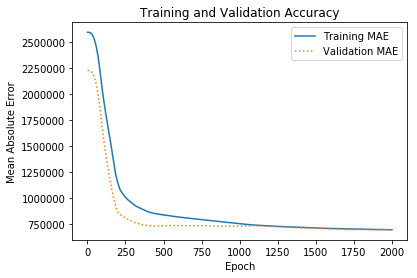

In [13]:
# Plot training accuracy and validation accuracy over time
%matplotlib inline
import matplotlib.pyplot as plt

err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

In [14]:
# Compute the R2 score
from sklearn.metrics import r2_score

r2_score(y_test, model.predict(x_test))

0.407390966496621

In [15]:
# Score the model
scores = model.evaluate(x_test, y_test, verbose=0)

for i in range(0, len(scores)):
    print(model.metrics_names[i] + ': ' + str(scores[i]))

loss: 695065.1960227273
mae: 695065.1875


In [16]:
# Use the model to make a prediction
import numpy as np

bathrooms = 1
bedrooms = 1
finished_sqft = 1040
total_rooms = 4
usecode_Condominium = 1
usecode_SingleFamily = 0

model.predict(scaler.transform(np.array([[bathrooms, bedrooms, finished_sqft, total_rooms, usecode_Condominium, usecode_SingleFamily]])))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[968752.94]], dtype=float32)